In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
/Users/pratikshirbhate/opt/anaconda3/envs/keras_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/pratikshirbhate/opt/anaconda3/envs/keras_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/pratikshirbhate/opt/anaconda3/envs/keras_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dt

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['Month', 'AirPassengers']

In [5]:
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.Month = pd.to_datetime(df['Month'])

In [7]:
df = df.set_index('Month')
df.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
train, test = df[:-12], df[-12:]

In [11]:
scalar = MinMaxScaler()
scalar.fit(train)
train = scalar.transform(train)
test = scalar.transform(test)

In [12]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [13]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator, epochs=180)


Epoch 1/180
20/20 [==============================] - 1s 38ms/step - loss: 0.0751
Epoch 2/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0143
Epoch 3/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0158
Epoch 4/180
20/20 [==============================] - 0s 21ms/step - loss: 0.0107
Epoch 5/180
20/20 [==============================] - 0s 19ms/step - loss: 0.0098
Epoch 6/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0101
Epoch 7/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0099
Epoch 8/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0086
Epoch 9/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0084
Epoch 10/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0097
Epoch 11/180
20/20 [==============================] - 0s 18ms/step - loss: 0.0096
Epoch 12/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0084
Epoch 13/180
20/20 [====

20/20 [==============================] - 0s 21ms/step - loss: 0.0019
Epoch 99/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0028
Epoch 100/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 101/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 102/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 103/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 104/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0029
Epoch 105/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0024
Epoch 106/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 107/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 108/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 109/180
20/20 [==============================] - 0s 16ms/step - loss: 0.0024
Epoch 110/180
20/20

In [15]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [17]:
df_predict = pd.DataFrame(scalar.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])
df_test = pd.concat([df, df_predict], axis=1)
df_test.head()

,AirPassengers,Predictions
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


In [19]:
df_test.tail(13)

,AirPassengers,Predictions
Month,,
1959-12-01,405,NaN
1960-01-01,417,383.529476
1960-02-01,391,383.453622
1960-03-01,419,422.316120
1960-04-01,461,430.634917
1960-05-01,472,464.871321
1960-06-01,535,533.063354
1960-07-01,622,606.873021
1960-08-01,606,608.856694


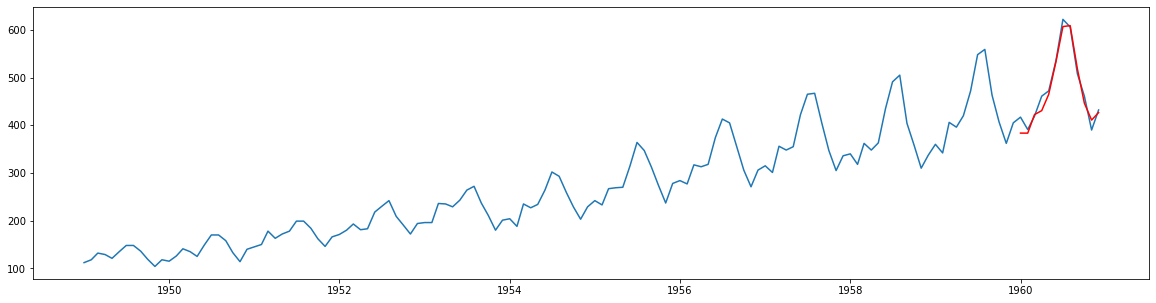

In [20]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test.AirPassengers)
plt.plot(df_test.index, df_test.Predictions, color='r')
plt.show()

In [23]:
train = df
scalar.fit(train)
train = scalar.fit_transform(train)
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model.fit_generator(generator, epochs=180)
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Epoch 1/180
22/22 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 2/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 3/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 4/180
22/22 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 5/180
22/22 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 6/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0024
Epoch 7/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 8/180
22/22 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 9/180
22/22 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 10/180
22/22 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 11/180
22/22 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 12/180
22/22 [==============================] - 0s 21ms/step - loss: 0.0013
Epoch 13/180
22/22 [=====

22/22 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 101/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 102/180
22/22 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 103/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 104/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 105/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 106/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 107/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 108/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 109/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 110/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 111/180
22/22 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 112/180
22/2

In [25]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,13)]
feature_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [27]:
feature_dates.tail(12)

,AirPassengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [28]:
df_predict = pd.DataFrame(scalar.inverse_transform(pred_list),
                         index=feature_dates[-n_input:].index, columns=['Predictions'])
df_proj = pd.concat([df, df_predict], axis=1)

In [29]:
df_proj.head()

,AirPassengers,Predictions
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN


In [30]:
df_proj.tail()

,AirPassengers,Predictions
1961-08-01,NaN,652.544718
1961-09-01,NaN,555.006021
1961-10-01,NaN,485.496701
1961-11-01,NaN,425.991873
1961-12-01,NaN,448.705620


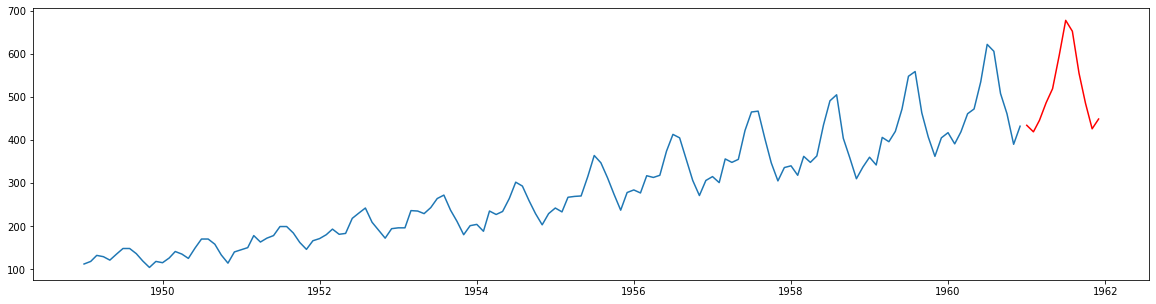

In [31]:
plt.figure(figsize=(20,5))
plt.plot(df_proj.index, df_proj.AirPassengers)
plt.plot(df_proj.index, df_proj.Predictions, color='r')
plt.show()